In [1]:
import time
import numpy as np
import seaborn as sns
from collections import Counter
import pandas  as pd
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import BaseDecisionTree
#from sklearn.ensemble.forest import BaseForest
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc,average_precision_score
from statistics import variance
import random
import matplotlib.pyplot as plt
from numpy import interp
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
seed=122334445
np.random.seed(seed)
random.seed(seed)
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('module')
warnings.simplefilter('ignore')
%matplotlib inline
plt.figure(figsize=(4,3))

header = ['clumpthickness', 'sizeUniformity', 'shapeUniformity', 'marginalAdhesion', 'epithelialSize', 'bareNucleoli', 'blandChromatin', 'normalNucleoli', 'mitoses','class']
data = pd.read_csv('Dataset/breastCancerWisconsin.csv', names=header,skiprows=1)
#data = pandas.read_csv('Dataset/breastCancerWisconsin.csv')
data.replace('?',0,inplace=True)

skf = StratifiedKFold(n_splits=10)
headers = list(data.columns.values)
x = data[headers[:-1]]
y = data[headers[-1:]]
print('CV Number of minority (positive=1)class  for 9 K-fold ( 443/10=44.3x9)=', np.sum(y == 1))
print('CV Number of majority class(Negative=0) for 9 K-fold (234/10=23.4x9)  =', np.sum(y == 0))

print('--------------------')
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
print('fffffffff')


CV Number of minority (positive=1)class  for 9 K-fold ( 443/10=44.3x9)= class    241
dtype: int64
CV Number of majority class(Negative=0) for 9 K-fold (234/10=23.4x9)  = class    458
dtype: int64
--------------------
fffffffff


<Figure size 288x216 with 0 Axes>

----------------testing result ----------------------------
Average accuracy of  5  time execution: 0.9059171842650103
Average G-means  of  5  time execution: 0.9066403381642513
Average precsion of  5  time execution: 0.8970860895210018
Average recall   of  5  time execution: 0.9066403381642513
Average F1-score of  5  time execution: 0.8978397249706955
Execution time: 0.002856292724609375 seconds
Average AUC of  5  time execution: 0.9066403381642513
----------------tarining result ----------------------------
Average accuracy of  5  time execution: 0.911652459181871
Average G-means  of  5  time execution: 0.9129737859780537
Average precsion of  5  time execution: 0.9000367602375337
Average recall   of  5  time execution: 0.9129737859780537
Average F1-score of  5  time execution: 0.9040728874912028
Average AUC of  5  time execution: 0.9129737859780537
------calcul varaince---------
 accuracy Variance of L execution : 2.2798846066467365e-05
 G-means Variance of L execution : 3.1447035753

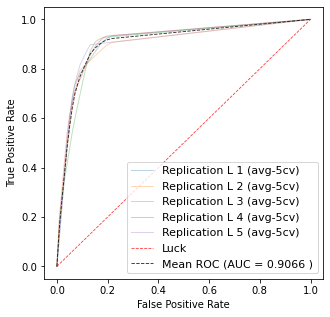

In [2]:
plt.figure(figsize=(5,5))
RUS_ite_acc=[]  # accuracies of different 5 iterations given 10 folds
RUS_ite_pre=[]  #  Precision of different 5 iterations given 10 folds
RUS_ite_rec=[]  # recall of different 5 iterations given 10 folds
RUS_ite_F1= []   # F-score of different 5 iterations given 10 folds
RUS_ite_GM= []   # G-means of different 5 iterations given 10 folds

RUS_ite_roc=[]  # roc of different 5 iterations given 10 folds
RUS_ite_au= []   # auc of different 5 iterations given 10 folds

RUS_ite_tprs=[]
mean_fpr = np.linspace(0, 1, 100)
#---------------------Testing Model performance---------------------"
#----------------------Training model performance---------------
TrainRUS_ite_acc=[]  # accuracies of different 5 iterations given 10 folds
TrainRUS_ite_pre=[]  #  Precision of different 5 iterations given 10 folds
TrainRUS_ite_rec=[]  # recall of different 5 iterations given 10 folds
TrainRUS_ite_F1= []   # F-score of different 5 iterations given 10 folds
TrainRUS_ite_GM= []   # G-means of different 5 iterations given 10 folds

TrainRUS_ite_roc=[]  # roc of different 5 iterations given 10 folds
TrainRUS_ite_au= []   # auc of different 5 iterations given 10 folds

Execution_time=[]
#----------------------Training model performance---------------\
i=1
for iteration in range(5):
#----------------------Training model performance---------------
    TrainRUS_kf_accuracy  = []
    TrainRUS_kf_precision = list()
    TrainRUS_kf_recall    = list()
    TrainRUS_G_means   = list()
    TrainRUS_F1score   = list()
    
    TrainRUS_kf_roc_probats  =list()
    TrainRUS_kf_auc_probats =list()
    
    TrainExecution_time =list()

  
#----------------------Training model performance---------------
#---------------------Testing Model performance---------------------
    RUS_kf_accuracy  = []
    #show=[]
    RUS_kf_precision = list()
    RUS_kf_recall    = list()
    RUS_kf_G_means   = list()
    RUS_kf_F1score   = list()
    
    RUS_kf_roc_probats  =list()
    RUS_kf_auc_probats =list()
    
    RUS_kf_tprs = []
    tprsinner = []
#---------------------Testing Model performance---------------------\n",
    for train_index, test_index in skf.split(x, y):
       x_train, x_test = x.iloc[train_index], x.iloc[test_index]
       y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#----------DT model---------------
       
       #DT = DecisionTreeClassifier(max_depth=1)
       #eec=BalancedRandomForestClassifier(sampling_strategy='majority',max_depth=1,random_state=1)
       rus = RandomUnderSampler(sampling_strategy='majority')
    
       X_res, y_res = rus.fit_resample(x_train, np.ravel(y_train))
       #DT = DecisionTreeClassifier(max_depth=1)
       RF =RandomForestClassifier(n_estimators=1,max_depth=1)
       
       
       start =time.time()
       RUS_model= RF.fit(X_res, y_res)
       end = time.time()
        
       running_secs=(end-start)
#----------------------Training model performance---------------
       train_y_pred=RUS_model.predict(x_train)
       TrainRUS_kf_accuracy.append(accuracy_score(y_train,  train_y_pred))
       TrainRUS_G_means.append(geometric_mean_score(y_train,train_y_pred, average='macro'))
       TrainRUS_p, TrainRUS_r, TrainRUS_f1core, _ = precision_recall_fscore_support(y_train,train_y_pred, average='macro')
       TrainRUS_kf_precision.append(TrainRUS_p)
       TrainRUS_kf_recall.append(TrainRUS_r)
       TrainRUS_F1score.append(TrainRUS_f1core)
       TrainExecution_time.append(running_secs)
 

#-------calcul roc/ auc for training----------

       train_pred_proba =RUS_model.predict_proba(x_train)
       train_Rus_yhat = train_pred_proba[:, 1]
        
       #TrainRus_kf_roc_probats  =list()
       #TrainRus_kf_auc_probats =list()
    
       train_Rus_fpr, train_Rus_tpr, thresholds = roc_curve(y_train, train_Rus_yhat, pos_label=1)
       train_Rus_roc_auc = auc(train_Rus_fpr, train_Rus_tpr)
       TrainRUS_kf_auc_probats.append(train_Rus_roc_auc) 

#----------------------Training model performance---------------



#---------------------Testing Model--------------------
       y_pred = RUS_model.predict(x_test)
       RUS_kf_accuracy.append(accuracy_score(y_test, y_pred))
       RUS_kf_G_means.append(geometric_mean_score(y_test, y_pred, average='macro'))
       RUS_p, RUS_r, RUS_f1core, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
       RUS_kf_precision.append(RUS_p)
       RUS_kf_recall.append(RUS_r)
       RUS_kf_F1score.append(RUS_f1core)
#------------calcul roc/auc for testing-------------

       y_pred_proba =RUS_model.predict_proba(x_test)
       Rus_yhat =  y_pred_proba[:, 1]
        
        #RUS_kf_roc_probats  =list()
       #RUS_kf_auc_probats =list()
    
       Rus_fpr, Rus_tpr, thresholds = roc_curve(y_test, Rus_yhat, pos_label=1)
       Rus_roc_auc = auc(Rus_fpr, Rus_tpr)

       RUS_kf_auc_probats.append(Rus_roc_auc) 
      
       
       RUS_kf_tprs.append(interp(mean_fpr, Rus_fpr, Rus_tpr))
       RUS_kf_tprs[-1][0] = 0.0

       tprsinner.append(interp(mean_fpr, Rus_fpr, Rus_tpr))
       tprsinner[-1][0] = 0.0

       
      # SMOTE_kf_fpr.extend(SMOTE_fpr)
       #SMOTE_kf_tpr.extend(SMOTE_tpr)
#---------------------Testing model performance----------------------

#---------------------Testing model performance----------------------    
    RUS_ite_acc.append(np.mean(RUS_kf_accuracy))
    RUS_ite_GM.append(np.mean(RUS_kf_G_means))
    RUS_ite_pre.append(np.mean(RUS_kf_precision))
    RUS_ite_rec.append(np.mean(RUS_kf_recall)) 
    RUS_ite_F1.append(np.mean(RUS_kf_F1score))
#----------calcul roc/ auc for testing --


    RUS_ite_au.append(np.mean(RUS_kf_auc_probats))  # auc of different 5 iterations given 10 folds

  #show.append(np.mean(DT_kf_accuracy))
    RUS_ite_tprs.extend(RUS_kf_tprs)
    
    mean_tprinner = np.mean(tprsinner, axis=0)
    mean_tprinner[-1] = 1.0
    
    plt.plot(mean_fpr ,mean_tprinner, lw=1, alpha=0.3,label='Replication L %d (avg-5cv) ' % (i))

    i=i+1

    
#---------------------Testing model performance----------------------


#----------------------Training model performance--------------- 
    TrainRUS_ite_acc.append(np.mean(TrainRUS_kf_accuracy))
    TrainRUS_ite_pre.append(np.mean(TrainRUS_kf_precision))
    TrainRUS_ite_rec.append(np.mean(TrainRUS_kf_recall))
    TrainRUS_ite_F1.append(np.mean(TrainRUS_F1score))
    TrainRUS_ite_GM.append(np.mean(TrainRUS_G_means))
    Execution_time.append(np.mean(TrainExecution_time))
#------------calcul Auc / roc for training----
    TrainRUS_ite_au.append(np.mean(TrainRUS_kf_auc_probats))

#----------------------Training model performance---------------
#----------------------Training model performance---------------
print('----------------testing result ----------------------------')
#print('show  values of 5 time execution, each time execute k-fold cross validation :', DT_ite_acc)
#----------------------Testing Result---------------
print(f'Average accuracy of  5  time execution: {np.mean(RUS_ite_acc)}')
#print(RUS_ite_acc)
print(f'Average G-means  of  5  time execution: {np.mean(RUS_ite_GM)}')
print(f'Average precsion of  5  time execution: {np.mean(RUS_ite_pre)}')
print(f'Average recall   of  5  time execution: {np.mean(RUS_ite_rec)}')
print(f'Average F1-score of  5  time execution: {np.mean(RUS_ite_F1)}')
print('Execution time:',np.mean( Execution_time), 'seconds')
print(f'Average AUC of  5  time execution: {np.mean(RUS_ite_au)}')
#----------------------Testing Result---------------
print('----------------tarining result ----------------------------')
#----------------------Training Result---------------
print(f'Average accuracy of  5  time execution: {np.mean(TrainRUS_ite_acc)}')
print(f'Average G-means  of  5  time execution: {np.mean(TrainRUS_ite_GM)}')
print(f'Average precsion of  5  time execution: {np.mean(TrainRUS_ite_pre)}')
print(f'Average recall   of  5  time execution: {np.mean(TrainRUS_ite_rec)}')
print(f'Average F1-score of  5  time execution: {np.mean(TrainRUS_ite_F1)}')
print(f'Average AUC of  5  time execution: {np.mean(TrainRUS_ite_au)}')
#----------------------Training Result-------------

print('------calcul varaince---------')
#----------calcul varaince of test result ---------------

accuracy_varaince= variance(RUS_ite_acc)
GM_variance=np.var(RUS_ite_GM)
GM_precision=np.var(RUS_ite_pre)
GM_recall=np.var(RUS_ite_rec)
GM_F1=np.var(RUS_ite_F1)
AUC_varaince=np.var(RUS_ite_au)

print(f' accuracy Variance of L execution : {accuracy_varaince}')

print(f' G-means Variance of L execution : {GM_variance}')
print(f' Precision Variance of L execution : {GM_precision}')
print(f' Recall Variance of L execution : {GM_recall}')
print(f' F1-score Variance of L execution : {GM_F1}')
print(f' AUC Variance of L execution : {AUC_varaince}')

print('-----------------F1-score boxplot--------------------')
print(f' boxplot values : {(RUS_ite_F1)}')
print('-----------------vF1-score boxplot-------------------')



print('-----------------Precsion boxplot--------------------')
print(f' boxplot values precsion : {(RUS_ite_pre)}')
print('-----------------Precsion boxplot------------------')

print('-----------------G-means boxplot--------------------')
print(f' boxplot values precsion : {(RUS_ite_GM)}')
print('-----------------G-means boxplot-----------------')

print('-----------------Recall box plot--------------------')
print(f' boxplot values precsion : {(RUS_ite_rec)}')
print('-----------------Recall box plot-------------------')

#----------calcul varaince of test result--------------

plt.plot([0, 1], [0, 1], linestyle='--', lw=0.8, color='r',label='Luck', alpha=.8)
    
RUSBoost_mean_tpr = np.mean(RUS_ite_tprs, axis=0)
RUSBoost_mean_tpr[-1] = 1.0
#mean_auc = auc(mean_fpr, mean_tpr)
#std_auc = np.std(aucs)

SmoteBoost_mean_auc = auc(mean_fpr, RUSBoost_mean_tpr)
#SmoteBoost_std_auc = np.std(SmoteBoost_outer_aucs)
plt.plot(mean_fpr, RUSBoost_mean_tpr,linestyle='--', color='000000',label=r'Mean ROC (AUC = %0.4f )' % (np.mean(RUS_ite_au)),lw=0.9, alpha=.8)

std_tpr = np.std(RUSBoost_mean_tpr, axis=0)
tprs_upper = np.minimum(RUSBoost_mean_tpr+ std_tpr, 1)
tprs_lower = np.maximum(RUSBoost_mean_tpr- std_tpr, 0)
#fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#plt.title('Under-sampling-DT')
#plt.title('ROC-jaya-HQE-Boost-DT')
plt.legend(fontsize="11", loc="lower right")
plt.savefig('undersampling.png', dpi=600, bbox_inches='tight')

plt.show()

